In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
plt.style.use('fivethirtyeight')

In [2]:
train =pd.read_csv('cleaned_train.csv')
test =pd.read_csv('cleaned_test.csv')

In [3]:
train.shape,test.shape

((32561, 15), (16281, 15))

In [4]:
dataset=pd.DataFrame()
dataset=dataset.append(train)
dataset =dataset.append(test)
dataset

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,0.571429,0.044302,0.866667,0.800000,0.833333,0.769231,0.8,1.00,1.0,0.021740,0.0,0.397959,1.0,0.0
1,0.452055,0.857143,0.048238,0.866667,0.800000,1.000000,0.846154,1.0,1.00,1.0,0.000000,0.0,0.122449,1.0,0.0
2,0.287671,1.000000,0.138113,1.000000,0.533333,0.666667,0.384615,0.8,1.00,1.0,0.000000,0.0,0.397959,1.0,0.0
3,0.493151,1.000000,0.151068,0.666667,0.400000,1.000000,0.384615,1.0,0.75,1.0,0.000000,0.0,0.397959,1.0,0.0
4,0.150685,1.000000,0.221488,0.866667,0.800000,1.000000,1.000000,0.2,0.75,0.0,0.000000,0.0,0.397959,0.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.301370,1.000000,0.136723,0.866667,0.800000,0.666667,1.000000,0.8,1.00,0.0,0.000000,0.0,0.357143,1.0,0.0
16277,0.643836,1.000000,0.208484,1.000000,0.533333,0.500000,0.769231,0.0,0.75,1.0,0.000000,0.0,0.397959,1.0,0.0
16278,0.287671,1.000000,0.244762,0.866667,0.800000,1.000000,1.000000,1.0,1.00,1.0,0.000000,0.0,0.500000,1.0,0.0
16279,0.369863,1.000000,0.047666,0.866667,0.800000,0.666667,0.692308,0.6,0.50,1.0,0.054551,0.0,0.397959,1.0,0.0


In [5]:
X=dataset.drop('income',axis=1)
y=dataset['income']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Feature Selection

In [7]:
from sklearn.ensemble import ExtraTreesRegressor
extra_tree_model =ExtraTreesRegressor()
extra_tree_model.fit(X,y)

ExtraTreesRegressor()

In [8]:
extra_tree_model.feature_importances_

array([0.14822283, 0.03768507, 0.16135557, 0.01969087, 0.1076019 ,
       0.08795649, 0.07331058, 0.08931863, 0.01937495, 0.02031436,
       0.10102528, 0.02692688, 0.08919389, 0.0180227 ])

In [9]:
feature_imp = pd.DataFrame(sorted(zip(X_train.columns,extra_tree_model.feature_importances_)),columns=['feature','values'])

In [10]:
feature_imp=feature_imp.sort_values(by='values',ascending=False)
feature_imp

,feature,values
5,fnlwgt,0.161356
0,age,0.148223
4,education_num,0.107602
1,capital_gain,0.101025
11,relationship,0.089319
6,hours_per_week,0.089194
7,marital_status,0.087956
9,occupation,0.073311
13,workclass,0.037685
2,capital_loss,0.026927


<AxesSubplot:xlabel='values', ylabel='feature'>

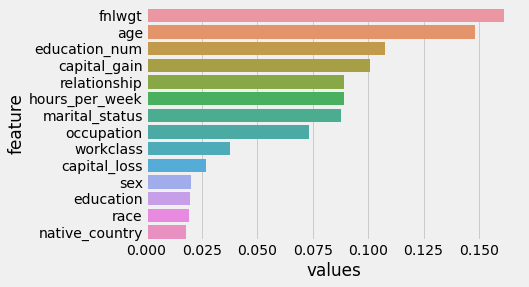

In [11]:
sns.barplot(x='values',y='feature',data=feature_imp)

# Model Buliding

In [12]:
from sklearn.linear_model import LogisticRegression
logestic_regression_model =LogisticRegression()
logestic_regression_model.fit(X_train,y_train)
y_pred =logestic_regression_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8369524754932374

In [13]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model =RandomForestClassifier(n_estimators=200)
random_forest_model.fit(X_train,y_train)
y_pred =random_forest_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8533937213053728

In [14]:
from xgboost import XGBClassifier
xgrfboost =XGBClassifier()
xgrfboost.fit(X_train,y_train)
y_pred =xgrfboost.predict(X_test)
accuracy_score(y_test,y_pred)

0.8702072217396699

# HyperParameter Tunning

In [15]:
#Number of tree in xgboost
n_estimators=[int(x) for x in np.linspace(100,1200,12)]

#various learning rate
learning_rate=['0.05','0.1','0.2','0.3']




In [16]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3']}


In [17]:
from sklearn.model_selection import RandomizedSearchCV
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = XGBClassifier(),
                               param_distributions = random_grid,
                               scoring='roc_auc_ovo', 
                               n_iter = 10,
                               cv =5,
                               random_state=42,
                               n_jobs = -1)
xg_random.fit(X,y)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...e,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                  

In [18]:
xg_random.best_params_

{'n_estimators': 500, 'learning_rate': '0.05'}

In [19]:
xg_random.best_score_

0.926254598871474

In [21]:
import pickle
with open('xgboost_model.pkl','wb') as model:
    pickle.dump(xg_random,model)